<a href="https://colab.research.google.com/github/haseebashraf5656/Question_1_Image_preprocessing/blob/main/Question_1_Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
# Load CIFAR-10 dataset
dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True
)

# Select two images
img1, label1 = dataset[0]
img2, label2 = dataset[1]

print("Original Image Size:", img1.size)


100%|██████████| 170M/170M [00:10<00:00, 16.2MB/s]


Original Image Size: (32, 32)


In [3]:
def show_images(img_list, titles):
    plt.figure(figsize=(12, 4))
    for i, img in enumerate(img_list):
        plt.subplot(1, len(img_list), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

def print_info(img, name):
    img_np = np.array(img)
    print(f"{name} -> Shape: {img_np.shape}, Pixel Range: [{img_np.min()}, {img_np.max()}]")


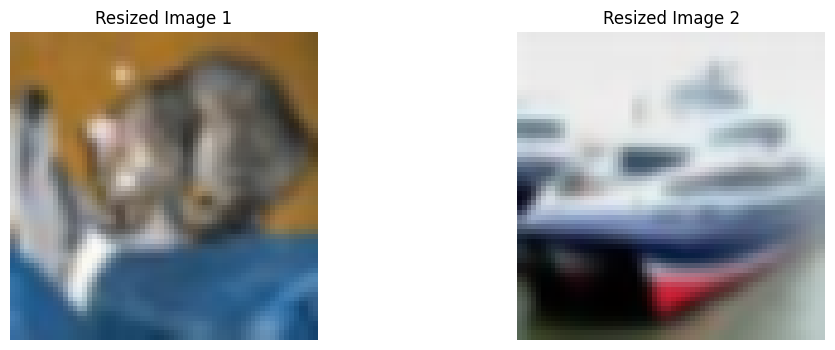

Resized Image 1 -> Shape: (64, 64, 3), Pixel Range: [18, 252]
Resized Image 2 -> Shape: (64, 64, 3), Pixel Range: [0, 243]


In [4]:
resize = transforms.Resize((64, 64))
img1_r = resize(img1)
img2_r = resize(img2)

show_images([img1_r, img2_r], ["Resized Image 1", "Resized Image 2"])
print_info(img1_r, "Resized Image 1")
print_info(img2_r, "Resized Image 2")


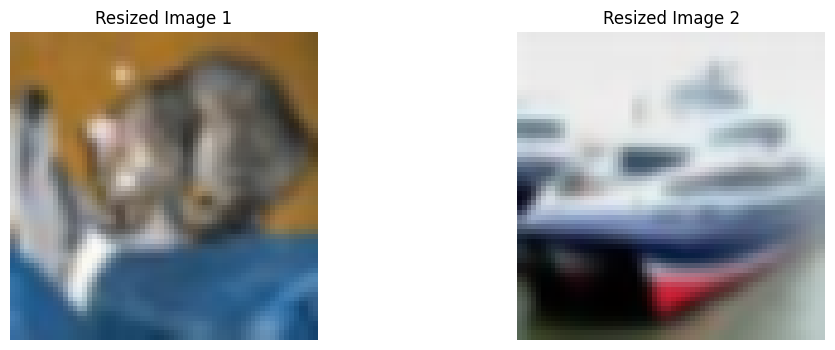

Resized Image 1 -> Shape: (64, 64, 3), Pixel Range: [18, 252]
Resized Image 2 -> Shape: (64, 64, 3), Pixel Range: [0, 243]


In [5]:
resize = transforms.Resize((64, 64))
img1_r = resize(img1)
img2_r = resize(img2)

show_images([img1_r, img2_r], ["Resized Image 1", "Resized Image 2"])
print_info(img1_r, "Resized Image 1")
print_info(img2_r, "Resized Image 2")


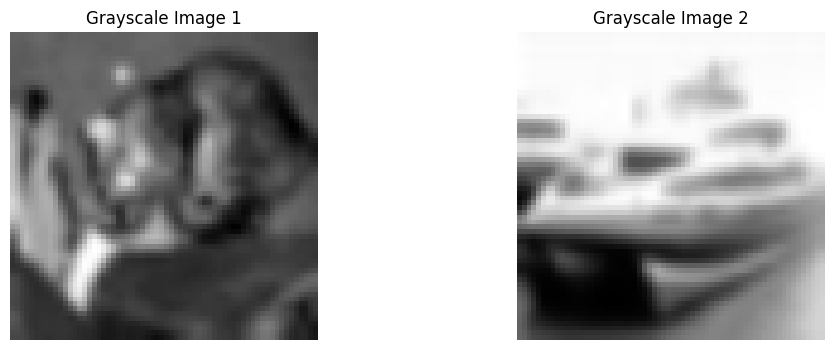

Grayscale Image 1 -> Shape: (64, 64), Pixel Range: [38, 251]
Grayscale Image 2 -> Shape: (64, 64), Pixel Range: [0, 239]


In [6]:
gray = transforms.Grayscale()
img1_g = gray(img1_r)
img2_g = gray(img2_r)

show_images([img1_g, img2_g], ["Grayscale Image 1", "Grayscale Image 2"])
print_info(img1_g, "Grayscale Image 1")
print_info(img2_g, "Grayscale Image 2")


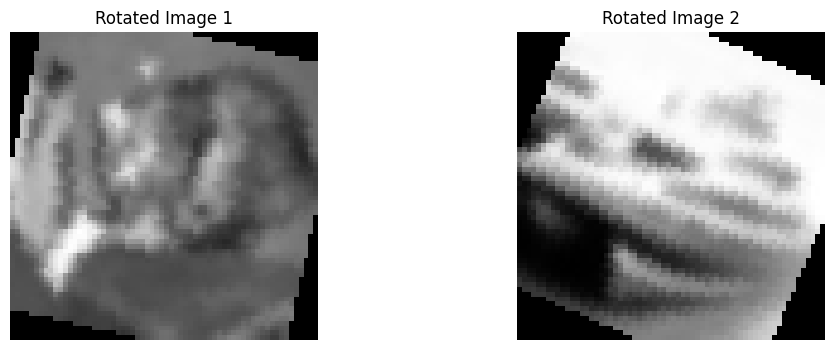

Rotated Image 1 -> Shape: (64, 64), Pixel Range: [0, 251]
Rotated Image 2 -> Shape: (64, 64), Pixel Range: [0, 239]


In [7]:
rotate = transforms.RandomRotation(degrees=30)
img1_rot = rotate(img1_g)
img2_rot = rotate(img2_g)

show_images([img1_rot, img2_rot], ["Rotated Image 1", "Rotated Image 2"])
print_info(img1_rot, "Rotated Image 1")
print_info(img2_rot, "Rotated Image 2")


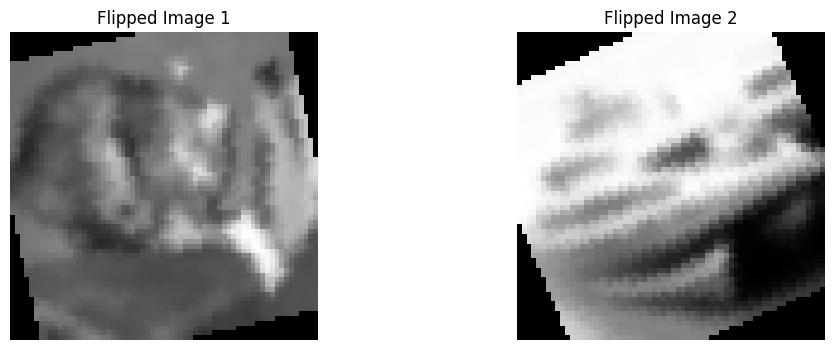

Flipped Image 1 -> Shape: (64, 64), Pixel Range: [0, 251]
Flipped Image 2 -> Shape: (64, 64), Pixel Range: [0, 239]


In [8]:
flip = transforms.RandomHorizontalFlip(p=1.0)
img1_f = flip(img1_rot)
img2_f = flip(img2_rot)

show_images([img1_f, img2_f], ["Flipped Image 1", "Flipped Image 2"])
print_info(img1_f, "Flipped Image 1")
print_info(img2_f, "Flipped Image 2")


In [9]:
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.5], std=[0.5])

img1_t = normalize(to_tensor(img1_f))
img2_t = normalize(to_tensor(img2_f))

print("Tensor Image 1 Shape:", img1_t.shape)
print("Tensor Image 2 Shape:", img2_t.shape)
print("Pixel Range Image 1:", img1_t.min().item(), img1_t.max().item())
print("Pixel Range Image 2:", img2_t.min().item(), img2_t.max().item())


Tensor Image 1 Shape: torch.Size([1, 64, 64])
Tensor Image 2 Shape: torch.Size([1, 64, 64])
Pixel Range Image 1: -1.0 0.9686274528503418
Pixel Range Image 2: -1.0 0.8745098114013672


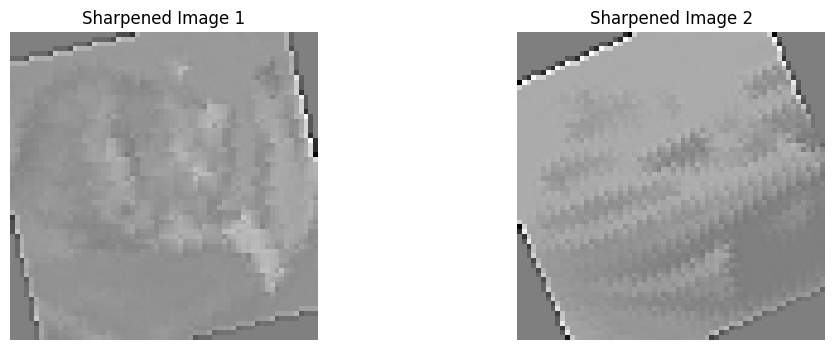

Sharpened Image 1 Pixel Range: tensor(-5.7843) tensor(3.7608)
Sharpened Image 2 Pixel Range: tensor(-6.4980) tensor(4.5137)


In [10]:
def apply_sharpen(img_tensor):
    img_np = img_tensor.squeeze().numpy()

    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    sharpened = cv2.filter2D(img_np, -1, kernel)
    return torch.tensor(sharpened).unsqueeze(0)

img1_sharp = apply_sharpen(img1_t)
img2_sharp = apply_sharpen(img2_t)

show_images(
    [img1_sharp.squeeze(), img2_sharp.squeeze()],
    ["Sharpened Image 1", "Sharpened Image 2"]
)

print("Sharpened Image 1 Pixel Range:", img1_sharp.min(), img1_sharp.max())
print("Sharpened Image 2 Pixel Range:", img2_sharp.min(), img2_sharp.max())


In [11]:
# Combine images into batch tensor
final_batch = torch.stack([img1_sharp, img2_sharp])

print("Final Tensor Shape:", final_batch.shape)


Final Tensor Shape: torch.Size([2, 1, 64, 64])
